In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer() 
import warnings
warnings.filterwarnings('ignore')

# 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [2]:
tweets = pd.read_csv(r"C:\Users\Suraj\Dropbox\My PC (DESKTOP-LAM9SRV)\Downloads\Elon_musk.csv",encoding='ISO 8859-1')
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
#Viewing teh length of the input twitter data
len(tweets.index)

1999

In [4]:
#Creating a column tweet with all the tweets in the Text column
tweets["Tweets"] = tweets["Text"]

In [5]:
from collections import Counter
import nltk


# i) RegEx for stopwords, Replace the symbol, '|' with ' '
# ii) Drop all stopwords
# iii) Generate DF out of Counter

In [6]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (tweets.Tweets
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')
words_data

,Frequency
Word,
,243
&amp;,218
@erdayastronaut,140
@spacex,140
@ppathole,123
...,...
watch,7
<u+2192>,7
progress,7


VADER Sentiment Analyzer is used to perform the sentiment analysis.

# Visualizing the length of all tweets from the input data

Text(0, 0.5, 'Count')

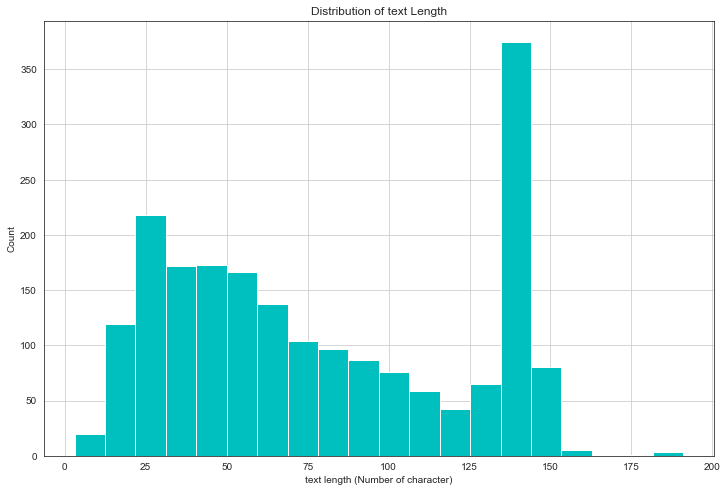

In [7]:
text_length = tweets["Tweets"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist(color='c',bins=20)
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

# Cleaning the input tweets for betting understanding to the Machine

In [8]:
# Converting all the reviews into a Lowercase text
tweets["Tweets"]= tweets["Tweets"].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [9]:
# Removing punctuations from the review
import string
tweets["Tweets"]=tweets["Tweets"].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [10]:
# Removing Numbers from the tweets and replacing it with nothing
tweets["Tweets"]=tweets["Tweets"].str.replace('[0-9]','')

In [13]:
# Loading the English stopwords from the nltk.corpus library
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Removing the stopwords from the tweets
tweets["Tweets"]=tweets["Tweets"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [15]:
# Creating a user defined function to clean the tweets
import re
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(Tweets):
    Tweets = Tweets.lower()
    Tweets = re.sub('\[.*?\]', '', text)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    Tweets = re.sub('\w*\d\w*', '', text)
    Tweets = re.sub("[0-9" "]+"," ",text)
    Tweets = re.sub('[‘’“”…]', '', text)
    
    return Tweets

clean = lambda x: clean_Tweets(x)
tweets.head()

,Unnamed: 0,Text,Tweets
0,1,@kunalb11 Im an alien,kunalb im alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextleve...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...


# Lemmatize all the words in the tweet to its root word

In [16]:
from textblob import Word
tweets["Tweets"]= tweets["Tweets"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [17]:
# Replace all special characters and symbols
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
tweets["Tweets"]= tweets["Tweets"].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [18]:
Tweets_set=tweets["Tweets"]
Tweets_set

0                                        kunalb im alien
1       idaacarmack ray tracing cyberpunk hdr nextleve...
2                        joerogan spotify great interview
3                               gtera doge underestimated
4       teslacn congratulation tesla china amazing exe...
                              ...                        
1994    flcnhvy true sound surreal negative propaganda...
1995    ppathole make sure read ur term amp condition ...
1996                    teslagong ppathole samwise gamgee
1997                      ppathole altho dumb dumber ufuf
1998                               progress update august
Name: Tweets, Length: 1999, dtype: object

# A user defined function to remove all the emoji's from the tweets

In [19]:
import re
import sys

def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" 
                           u"\U0001F300-\U0001F5FF" 
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [20]:
def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF" 
                               u"\U0001F680-\U0001F6FF" 
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF" 
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Importing countvectorizer to create a bag of words model

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(tweets["Tweets"])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aber  able  abo  aboard  abort  absence  absolute  absolutely  absorb  \
0        0     0    0       0      0        0         0           0       0   
1        0     0    0       0      0        0         0           0       0   
2        0     0    0       0      0        0         0           0       0   
3        0     0    0       0      0        0         0           0       0   
4        0     0    0       0      0        0         0           0       0   
...    ...   ...  ...     ...    ...      ...       ...         ...     ...   
1994     0     0    0       0      0        0         0           0       0   
1995     0     0    0       0      0        0         0           0       0   
1996     0     0    0       0      0        0         0           0       0   
1997     0     0    0       0      0        0         0           0       0   
1998     0     0    0       0      0        0         0           0       0   

      absorption  ...  zikryzamir  zip  zogfotpik  

# Creating TF-Idf vectorizer model, which allocates different weights to different words, rather than assigning equal weights, when compared to a bag of words model

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(tweets["Tweets"])
print(TFIDF)

  (0, 112)	0.6623688405640785
  (0, 2668)	0.7491778954626188
  (1, 4516)	0.3503086432516702
  (1, 3131)	0.39490911009737484
  (1, 1636)	0.4162521748644735
  (1, 878)	0.35842289988597426
  (1, 4493)	0.4162521748644735
  (1, 3597)	0.4162521748644735
  (1, 2403)	0.2703073340188711
  (2, 2519)	0.5043290017718325
  (2, 1567)	0.3080284702583498
  (2, 4107)	0.5704255952716918
  (2, 2590)	0.5704255952716918
  (3, 4619)	0.6108339384056402
  (3, 1037)	0.5037497388423235
  (3, 1586)	0.6108339384056402
  (4, 1231)	0.2876711653018475
  (4, 3130)	0.27277696499630993
  (4, 4900)	0.24937628204523501
  (4, 2689)	0.32114907525749786
  (4, 1259)	0.4094092137495757
  (4, 140)	0.3260835812455286
  (4, 642)	0.3525306208428504
  (4, 4334)	0.1828625922881543
  (4, 764)	0.3260835812455286
  :	:
  (1994, 146)	0.1467268755427102
  (1994, 4524)	0.2232488943707964
  (1994, 1382)	0.17157171851514066
  (1995, 21)	0.4008409077440879
  (1995, 678)	0.4008409077440879
  (1995, 4329)	0.36570555829866774
  (1995, 753)	0.3

# Visualizing the Twitter data with word cloud, to see the highly commnly used words in the tweets

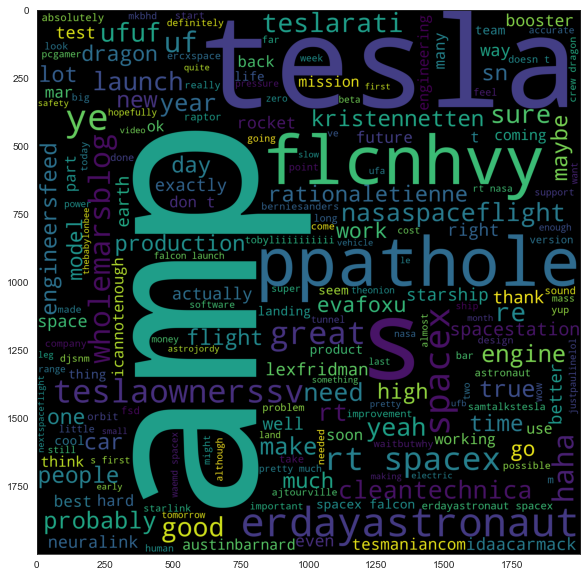

In [23]:
Review_wordcloud = ' '.join(tweets["Tweets"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

# Printing the frequency of the first 20 words in the whole Elon musk tweet

In [24]:
freq = pd.Series(' '.join(tweets["Tweets"]).split()).value_counts()[0:20]
freq

spacex             239
amp                218
tesla              169
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
launch              56
its                56
haha                55
nasaspaceflight     55
uf                  53
good                52
year                48
sure                43
dtype: int64

In [25]:
import collections
from collections import Counter

# Calculating the polarity score of the tweets

In [26]:
from textblob import TextBlob
tweets['polarity'] = tweets["Tweets"].apply(lambda x: TextBlob(x).sentiment[0])
tweets[['Tweets','polarity']].head()

,Tweets,polarity
0,kunalb im alien,-0.25
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.00
2,joerogan spotify great interview,0.80
3,gtera doge underestimated,0.00
4,teslacn congratulation tesla china amazing exe...,0.20


# Displaying top 5 positive posts of Category_A

In [27]:
tweets[tweets.polarity>0].head()

,Unnamed: 0,Text,Tweets,polarity
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.800000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...,0.200000
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year ox httpstcowfkmyuoj,0.468182
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owensparks flcnhvy anonyx haha thanks,0.200000
9,10,The most entertaining outcome is the most likely,entertaining outcome likely,0.250000


# Dropping the Text column, from the original data

In [28]:
tweets = tweets.drop(['Text'], axis = 1)
tweets

,Unnamed: 0,Tweets,polarity
0,1,kunalb im alien,-0.250000
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000
2,3,joerogan spotify great interview,0.800000
3,4,gtera doge underestimated,0.000000
4,5,teslacn congratulation tesla china amazing exe...,0.200000
...,...,...,...
1994,1995,flcnhvy true sound surreal negative propaganda...,0.152381
1995,1996,ppathole make sure read ur term amp condition ...,0.500000
1996,1997,teslagong ppathole samwise gamgee,0.000000
1997,1998,ppathole altho dumb dumber ufuf,-0.375000


# Creating a user defined function to identify if the tweets are positive, negative or neutral

In [29]:
def sent_type(Tweets): 
    for i in (Tweets):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')
sent_type(tweets['polarity'])

negative
neutral
positive
neutral
positive
positive
negative
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutral

# Assigning that a tweet is positive or negative based on the polarity score value

In [30]:
tweets["category"]=tweets['polarity']

tweets.loc[tweets.category > 0,'category']="Positive"
tweets.loc[tweets.category !='Positive','category']="Negative"

tweets["category"]=tweets["category"].astype('category')
tweets.dtypes

Unnamed: 0       int64
Tweets          object
polarity       float64
category      category
dtype: object

# Visualising the positive and the negative words in the Elon musk tweet on the whole

<AxesSubplot:xlabel='category', ylabel='count'>

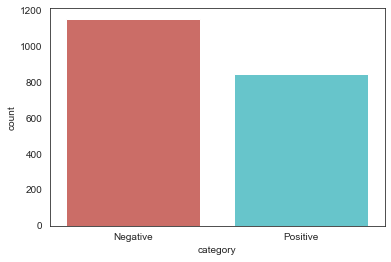

In [31]:
sns.countplot(x='category',data=tweets,palette='hls')

In [32]:
tweets.category.value_counts(normalize=True).mul(100)

Negative    57.778889
Positive    42.221111
Name: category, dtype: float64

# Visualising the positive and negative words used in the tweets, using Word cloud

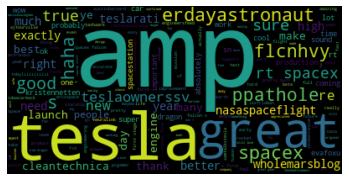

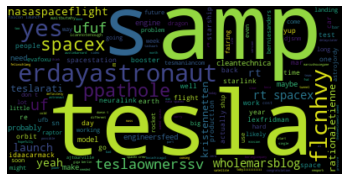

In [33]:
positive_reviews= tweets[tweets.category=='Positive']
negative_reviews= tweets[tweets.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Tweets.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Tweets.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

# Conclusion:
# From the model and the word cloud that we have created it is clear that, in the tweets, the most frequent words used includes amp,great,tesla,spacex etc.
# From the probabilties predicted by sentiment analysis, these tweets have 58% negative words and 42% positive words.

# 2) i) Extract reviews of any product from ecommerce website like amazon
# ii)Perform emotion mining

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import spacy
import re

from nltk import tokenize
from autoscraper import AutoScraper

from wordcloud import WordCloud, STOPWORDS

# Amazon review scraping and text mining


In [6]:
from bs4 import BeautifulSoup as bs
import requests

In [7]:
link = 'https://www.amazon.in/Theory-Everything-Stephen-Hawking/product-reviews/8179925919/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'


In [8]:
page = requests.get(link)

In [9]:

page

<Response [200]>

In [10]:
page.content


b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n\n<!-- sp:end-feature:csm:head-open-part2 -->\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41tGz3DNCrL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.cs

In [11]:
soup = bs(page.content,'html.parser')


In [12]:
review = soup.find_all("span",{"data-hook":"review-body"})
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>It is Very informative book for space lovers and everyone . I recommend you to buy this .</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>To my surprise, all the pages were intact unlike the negative reviews. The content is amazing and the print quality is quite amazing and I am totally satisfied with the product.</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Good book</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Well the print quality is good 😊. Thanks for the fast delivery</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Everyone should read this as Hawkins beautifully explain his great contribution which is Hawkins Radiation.</span>
 </span>,
 <span clas

In [13]:
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content

['\nIt is Very informative book for space lovers and everyone . I recommend you to buy this .\n',
 '\nTo my surprise, all the pages were intact unlike the negative reviews. The content is amazing and the print quality is quite amazing and I am totally satisfied with the product.\n',
 '\nGood book\n',
 '\nWell the print quality is good 😊. Thanks for the fast delivery\n',
 '\nEveryone should read this as Hawkins beautifully explain his great contribution which is Hawkins Radiation.\n',
 '\nHonestly, i did not expected such fast delivery, the book was delivered in 1 day, the book is NEW. clean and bright. Page quality is good (Not as such cheap).But, the only thing which struck was the book is so "thin". ~150pgs approx!\n',
 '\nGood\n',
 '',
 '\nOne should read this\n',
 "\nMost people know who Hawking is, and what his contributions to the world of science were. One of the brightest minds of our generation, so it doesn't make much sense to discuss more about him.The book is a progressivel

In [14]:
review_content[:] = [reviews.strip() for reviews in review_content]
review_content

['It is Very informative book for space lovers and everyone . I recommend you to buy this .',
 'To my surprise, all the pages were intact unlike the negative reviews. The content is amazing and the print quality is quite amazing and I am totally satisfied with the product.',
 'Good book',
 'Well the print quality is good 😊. Thanks for the fast delivery',
 'Everyone should read this as Hawkins beautifully explain his great contribution which is Hawkins Radiation.',
 'Honestly, i did not expected such fast delivery, the book was delivered in 1 day, the book is NEW. clean and bright. Page quality is good (Not as such cheap).But, the only thing which struck was the book is so "thin". ~150pgs approx!',
 'Good',
 '',
 'One should read this',
 "Most people know who Hawking is, and what his contributions to the world of science were. One of the brightest minds of our generation, so it doesn't make much sense to discuss more about him.The book is a progressively challenging read. As the subject

In [15]:
df = pd.DataFrame()

In [16]:
df['Text']=review_content
df

,Text
0,It is Very informative book for space lovers a...
1,"To my surprise, all the pages were intact unli..."
2,Good book
3,Well the print quality is good 😊. Thanks for t...
4,Everyone should read this as Hawkins beautiful...
5,"Honestly, i did not expected such fast deliver..."
6,Good
7,
8,One should read this
9,"Most people know who Hawking is, and what his ..."


# Word frequency


In [17]:
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq

the        30
is         14
of         13
and        10
to         10
book        8
it          6
a           6
in          4
for         4
good        3
what        3
quality     3
how         3
this        3
read        3
his         3
reader      3
Hawking     3
Hawkins     2
dtype: int64

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# removing stopwords


In [19]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [20]:
df['Text']

0    It Very informative book space lovers everyone...
1    To surprise, pages intact unlike negative revi...
2                                            Good book
3      Well print quality good 😊. Thanks fast delivery
4    Everyone read Hawkins beautifully explain grea...
5    Honestly, expected fast delivery, book deliver...
6                                                 Good
7                                                     
8                                             One read
9    Most people know Hawking is, contributions wor...
Name: Text, dtype: object

# word frequency after removal of stopwords


In [21]:
freq_Sw = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq_Sw

book       8
read       3
reader     3
Hawking    3
quality    3
good       3
matter     2
And        2
amazing    2
print      2
also       2
make       2
Good       2
One        2
fast       2
Hawkins    2
science    2
content    2
find       2
may        2
dtype: int64

In [22]:
df.shape

(10, 1)

# Word frequency 

In [23]:

freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq

book       8
read       3
reader     3
Hawking    3
quality    3
good       3
matter     2
And        2
amazing    2
print      2
also       2
make       2
Good       2
One        2
fast       2
Hawkins    2
science    2
content    2
find       2
may        2
dtype: int64

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# removing stopwords


In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [26]:
df['Text']

0    It Very informative book space lovers everyone...
1    To surprise, pages intact unlike negative revi...
2                                            Good book
3      Well print quality good 😊. Thanks fast delivery
4    Everyone read Hawkins beautifully explain grea...
5    Honestly, expected fast delivery, book deliver...
6                                                 Good
7                                                     
8                                             One read
9    Most people know Hawking is, contributions wor...
Name: Text, dtype: object

In [27]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq_Sw

book       8
read       3
reader     3
Hawking    3
quality    3
good       3
matter     2
And        2
amazing    2
print      2
also       2
make       2
Good       2
One        2
fast       2
Hawkins    2
science    2
content    2
find       2
may        2
dtype: int64

In [28]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity


In [30]:
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)

df

,Text,subjectivity,polarity
0,It Very informative book space lovers everyone...,0.300000,0.200000
1,"To surprise, pages intact unlike negative revi...",0.800000,0.350000
2,Good book,0.600000,0.700000
3,Well print quality good 😊. Thanks fast delivery,0.466667,0.366667
4,Everyone read Hawkins beautifully explain grea...,0.875000,0.825000
5,"Honestly, expected fast delivery, book deliver...",0.629221,0.214719
6,Good,0.600000,0.700000
7,,0.000000,0.000000
8,One read,0.000000,0.000000
9,"Most people know Hawking is, contributions wor...",0.379010,0.155482


The polarity is a value ranging between -1 and 1, with -1 being very negative and +1 very positive. The subjectivity ranges between 0 and 1, and refers to the person’s opinion, emotion, or even judgment. The higher the number, the more subjective the text is.


# Creating a word cloud


In [31]:
from wordcloud import WordCloud, STOPWORDS

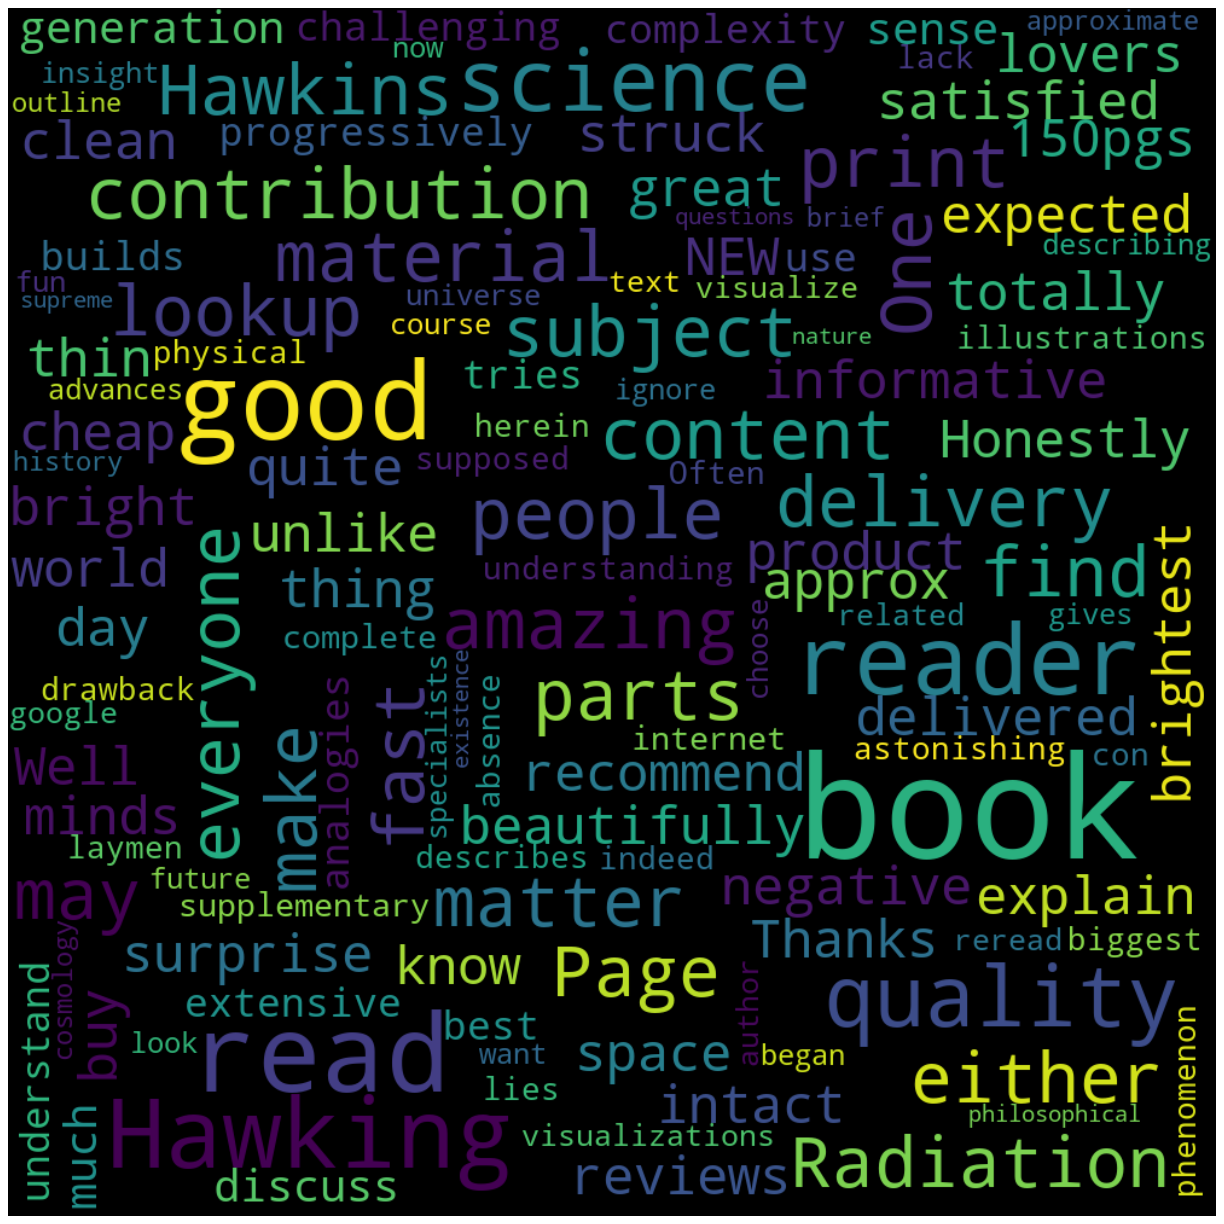

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in df['Text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [33]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [34]:
# Create a New Analysis Column
df["analysis"] = df["polarity"].apply(analysis)
# Print The Data
df

,Text,subjectivity,polarity,analysis
0,It Very informative book space lovers everyone...,0.300000,0.200000,Positive
1,"To surprise, pages intact unlike negative revi...",0.800000,0.350000,Positive
2,Good book,0.600000,0.700000,Positive
3,Well print quality good 😊. Thanks fast delivery,0.466667,0.366667,Positive
4,Everyone read Hawkins beautifully explain grea...,0.875000,0.825000,Positive
5,"Honestly, expected fast delivery, book deliver...",0.629221,0.214719,Positive
6,Good,0.600000,0.700000,Positive
7,,0.000000,0.000000,Neutral
8,One read,0.000000,0.000000,Neutral
9,"Most people know Hawking is, contributions wor...",0.379010,0.155482,Positive


In [35]:
### Displaying the positive and negative reviews
positive_reviews = df[df['analysis'] == 'Positive']
negative_reviews = df[df['analysis'] == 'Negative']

print('positive Reviews')
for i, row in positive_reviews[:5].iterrows():
  print(' -' + row['Text'])

print('negative Reviews')
for i, row in negative_reviews[:5].iterrows():
  print(' -' + row['Text'])

positive Reviews
 -It Very informative book space lovers everyone . I recommend buy .
 -To surprise, pages intact unlike negative reviews. The content amazing print quality quite amazing I totally satisfied product.
 -Good book
 -Well print quality good 😊. Thanks fast delivery
 -Everyone read Hawkins beautifully explain great contribution Hawkins Radiation.
negative Reviews


# Most of the reviews are positive or negative?

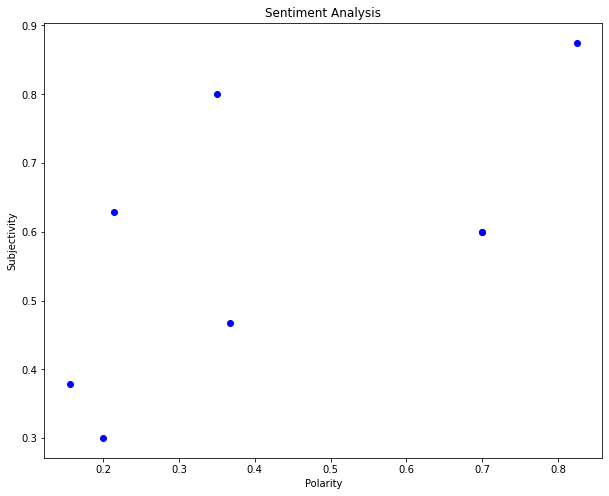

In [38]:
plt.figure(figsize=(10, 8))

for i in range(0, df.shape[0]):
    plt.scatter(df["polarity"][i], df["subjectivity"][i], color = "blue")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

# The book has mostly positive reviews compared to negative onces